# EDA part 2 Studio

## Further Analysis of IMDB movies

In this studio, we're returning to this [tutorial](https://towardsdatascience.com/understand-the-data-with-univariate-and-multivariate-charts-and-plots-in-python-3b9fcd68cd8) as a reference guide for our EDA.
You've seen the data set before and you've worked through similar kinds of questions with the heart disease dataset. 

Blocks have been created for your code and we've asked you to add more in some places.

The dataset from [Kaggle](https://www.kaggle.com/PromptCloudHQ/imdb-data)

### 1. Find the relative proportions of movie genres represented.

In [1]:
# import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# create your data variabe using .read_csv 
movies = pd.read_csv("IMDB-Movie-Data.csv")
# get reaquainted with the data by viewing the first 5 rows
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [2]:
# list the column names
movies.columns.to_list()


['Rank',
 'Title',
 'Genre',
 'Description',
 'Director',
 'Actors',
 'Year',
 'Runtime (Minutes)',
 'Rating',
 'Votes',
 'Revenue (Millions)',
 'Metascore']

In [3]:
# preview the contents of the 'Genre' column only
movies[['Genre']]

,Genre
0,"Action,Adventure,Sci-Fi"
1,"Adventure,Mystery,Sci-Fi"
2,"Horror,Thriller"
3,"Animation,Comedy,Family"
4,"Action,Adventure,Fantasy"
...,...
995,"Crime,Drama,Mystery"
996,Horror
997,"Drama,Music,Romance"
998,"Adventure,Comedy"


In [4]:
# using the .value_counts() method, explore the number of each genre type in the series
# assign the result to a variable called genre_counts
genre_counts = movies.Genre.value_counts()
print(genre_counts)

Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
                           ..
Action,Comedy,Family        1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: Genre, Length: 207, dtype: int64


In [5]:
# Find the proportions of each genre by dividing your variable assigned above by the sum of 
# all of the unique genre values
# assign this to the variable genre_proportions

genre_proportions = genre_counts/genre_counts.unique().sum()
print(genre_proportions)

Action,Adventure,Sci-Fi    0.110132
Drama                      0.105727
Comedy,Drama,Romance       0.077093
Comedy                     0.070485
Drama,Romance              0.068282
                             ...   
Action,Comedy,Family       0.002203
Action,Crime,Fantasy       0.002203
Comedy,Mystery             0.002203
Adventure,Comedy,Horror    0.002203
Comedy,Family,Fantasy      0.002203
Name: Genre, Length: 207, dtype: float64


In [6]:
# the length of results a above is too long to know if there are any null values present
# we can run .isna() on the series and collect the sum to check if there are missing values
# uncomment the line below to see the results
(movies['Genre'].isna().sum())


0

In [7]:
# use .head() on genre_proportions to get a better look at the top 20 
# remember: .head() can take a parameter to display more than 5 entries 
genre_proportions.head(20)

Action,Adventure,Sci-Fi       0.110132
Drama                         0.105727
Comedy,Drama,Romance          0.077093
Comedy                        0.070485
Drama,Romance                 0.068282
Animation,Adventure,Comedy    0.059471
Action,Adventure,Fantasy      0.059471
Comedy,Drama                  0.059471
Comedy,Romance                0.057269
Crime,Drama,Thriller          0.052863
Crime,Drama,Mystery           0.050661
Action,Adventure,Drama        0.039648
Action,Crime,Drama            0.037445
Horror,Thriller               0.035242
Drama,Thriller                0.033040
Adventure,Family,Fantasy      0.030837
Biography,Drama,History       0.030837
Action,Adventure,Comedy       0.030837
Biography,Drama               0.030837
Action,Comedy,Crime           0.026432
Name: Genre, dtype: float64

### 2. Find the minimum, maximum, average, and standard deviation of revenue data.

In [8]:
# use .describe() on the revenue column to see some summary statistics of the revenue data present
movies['Revenue (Millions)'].describe()

count    872.000000
mean      82.956376
std      103.253540
min        0.000000
25%       13.270000
50%       47.985000
75%      113.715000
max      936.630000
Name: Revenue (Millions), dtype: float64

Do we have any missing revenue entries?
Add a new code cell below this and use ``.isna()`` on the column to check.
Ask yourself: does this affect the results of ``.describe()``?
Hint: look at the count result above and compare that with the ``Length`` returned with ``.isna()``

In [9]:
movies['Revenue (Millions)'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996    False
997    False
998     True
999    False
Name: Revenue (Millions), Length: 1000, dtype: bool

### 3. Make a plot distribution of the revenue data.


<AxesSubplot:xlabel='Revenue (Millions)', ylabel='Count'>

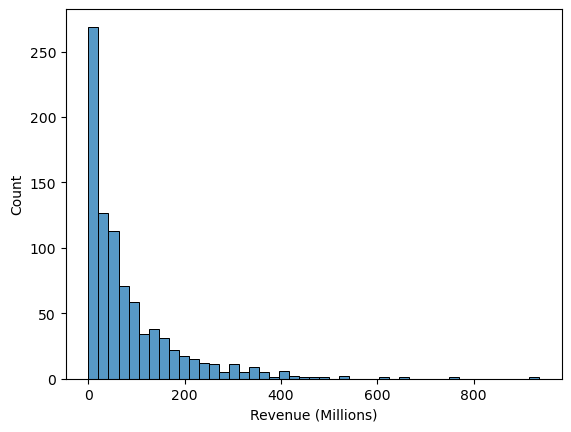

In [10]:
# use sns.histplot to get a birds eye view of the revenue distribution
# Note: the refernce article plots Cholesterol data with ``distplot`` but we recieve 
# a deprecation warning so we've switched it with ``histplot``. The resulting graph is 
# virtually the same.
sns.histplot(data=movies, x='Revenue (Millions)')

Look back at your ``.describe()`` results above. Does this plotted distribution match the results of the 25%, 50%, and 75% percentile data?

Create another code cell below this and make another histplot but with only the top 20 items in the revenue column. Run ``.describe()`` on the top 20 to again check the percentile distributions with what the graph displays.

In [11]:
movies.sort_values(by = 'Revenue (Millions)', ascending = False).head(1)
Top_revenues = movies.sort_values(by = 'Revenue (Millions)', ascending = False)
Top_revenues.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


In [12]:
Top_revenues.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


Text(0.5, 1.0, 'Top 20 Movies by Revenue')

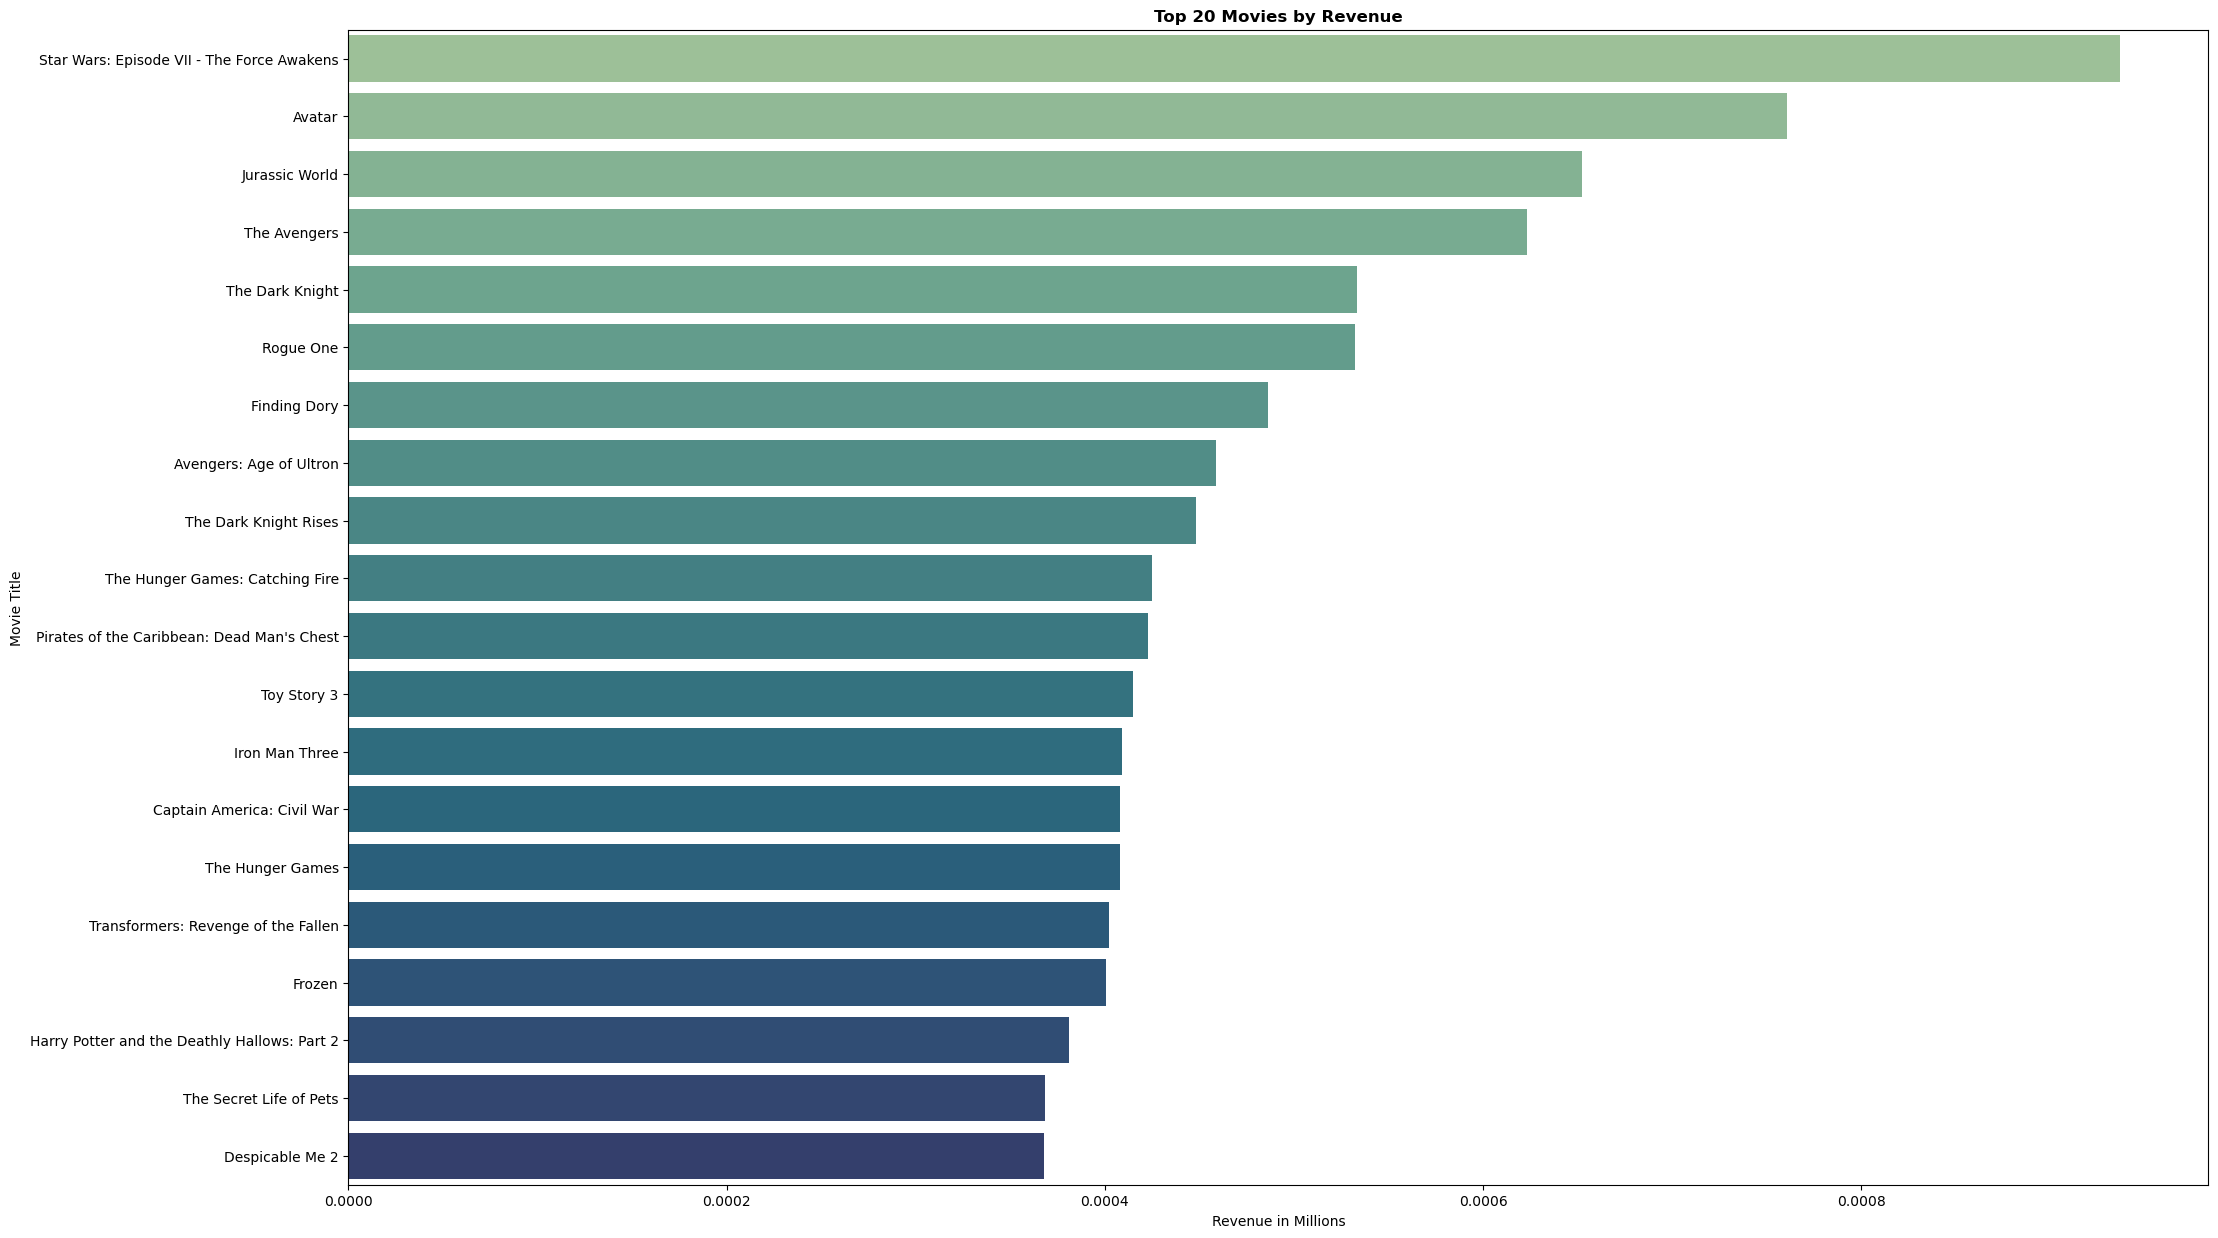

In [13]:
fig,axs=plt.subplots(figsize=(24,15))
#bar=sns.barplot(x=Top_revenues['Title'][:20],y=(Top_revenues['Revenue (Millions)']/1000000)[:20],palette = 'crest')
bar=sns.barplot(x=(Top_revenues['Revenue (Millions)']/1000000)[:20],y=Top_revenues['Title'][:20],palette = 'crest')
bar.set(xlabel='Revenue in Millions', ylabel='Movie Title')
bar.set_title("Top 20 Movies by Revenue",weight='bold')

### 4. Find the % of movies with a higher than avergage Rating

In [14]:
# create a variable called mean_rating.
# assign mean_rating the result of running ``.mean()`` on the rating column.
mean_rating = movies['Rating'].mean()
print(mean_rating)


6.723200000000003


In [15]:
# Find the dataset where a movie's rating is higher than mean_rating. 
# Divide that by the length of the total dataset.

high_rated = movies.loc[movies['Rating'] > mean_rating]

print(len(high_rated)/len(movies))

0.513


### 5. Plot the rating data against genre to observe the difference in score in different movie types

In [16]:
# run describe on the rating column

movies.Rating.describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Rating', ylabel='Genre'>

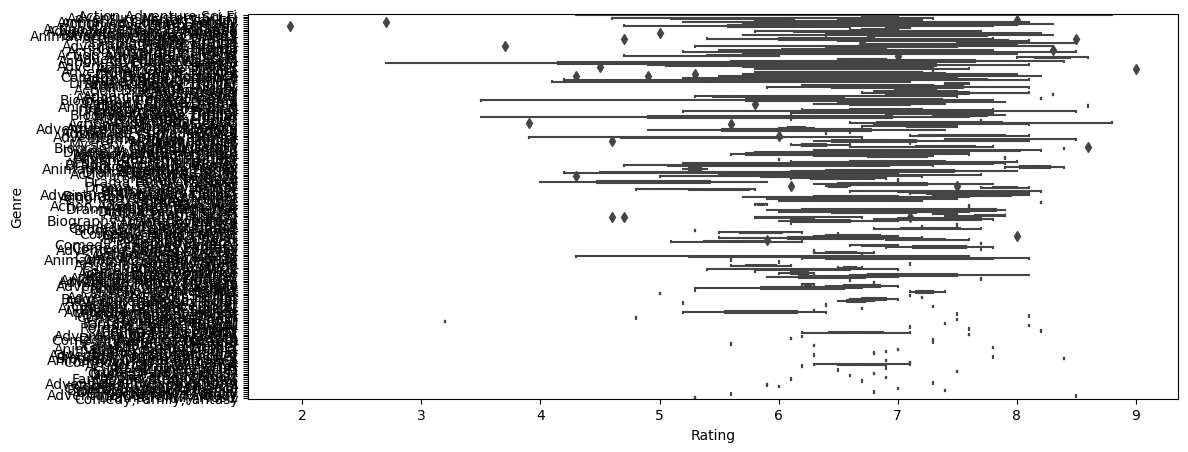

In [17]:
# Plot the rating data against genres
# First, lets mirror what our reference article plots

plt.figure(figsize=(12,5))
sns.boxplot(x = 'Rating', y = 'Genre', data=movies)


That graph isn't very helpful! 
Create a new code cell below this and create the same plot, but this time for data used,
use only the first 20 entries.
Do you find that any easier to read and interpret?
Next, create one more cell. Use the same axes and the top 20 items in the data, but plot using ``sns.scatterplot()``. Do you learn anything different between the boxplot and the scatterplot?

<AxesSubplot:xlabel='Rating', ylabel='Genre'>

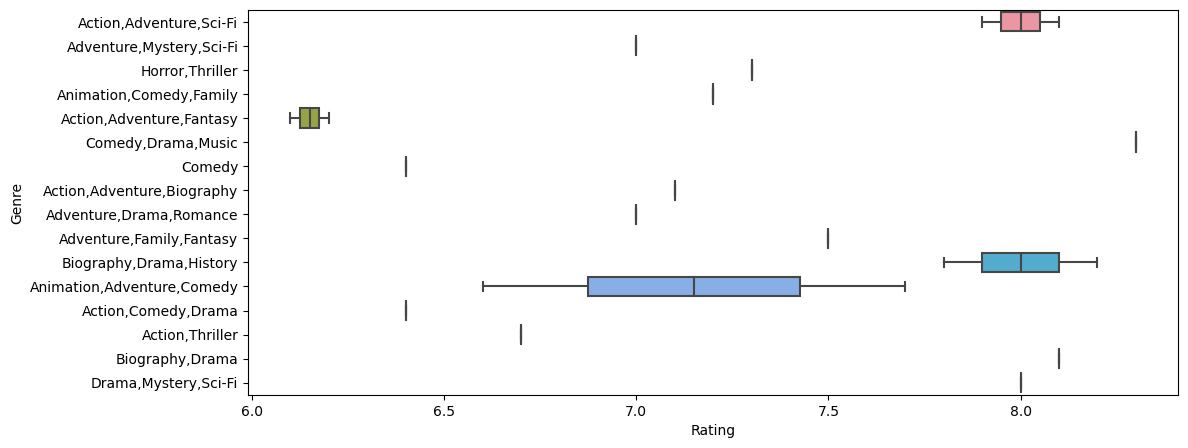

In [18]:
plt.figure(figsize=(12,5))
sns.boxplot(x = 'Rating', y = 'Genre', data=movies.head(20))

<AxesSubplot:xlabel='Rating', ylabel='Genre'>

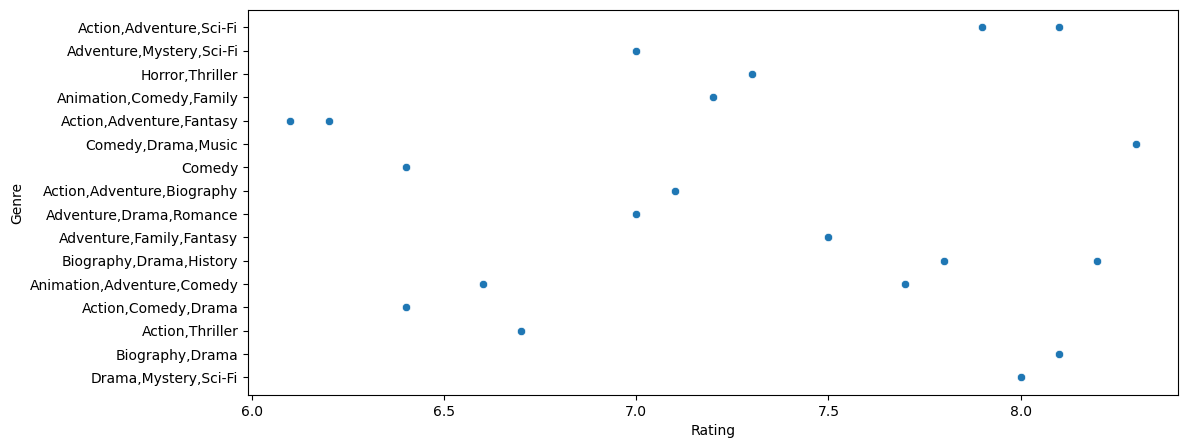

In [19]:
plt.figure(figsize=(12,5))
sns.scatterplot(x = 'Rating', y = 'Genre', data=movies.head(20))

### 6. Make a chart to show the number of films in each rating group each year

In [27]:
# Create a new column called rating_group
# Use to pd.cut() to bin(group) the rating_group column values by integer intervals 1-10
movies['rating_group'] = pd.cut(movies.Rating, range(1,11))

#movies['rating_group'].head(10)


0    (8, 9]
1    (6, 7]
2    (7, 8]
3    (7, 8]
4    (6, 7]
5    (6, 7]
6    (8, 9]
7    (6, 7]
8    (7, 8]
9    (6, 7]
Name: rating_group, dtype: category
Categories (9, interval[int64, right]): [(1, 2] < (2, 3] < (3, 4] < (4, 5] ... (6, 7] < (7, 8] < (8, 9] < (9, 10]]

In [38]:
# Make a chart to show the number of films in each rating group per year
yr_genre = pd.pivot_table(movies, index='Year', columns=['Genre', 'rating_group'], aggfunc=len, fill_value=0)

In [39]:
#yr_genre['Count'] = yr_genre.sum(axis = 1)

yr_genre.head()

Actors                                                            \
Genre        Action        Action,Adventure        Action,Adventure,Biography   
rating_group (4, 5] (7, 8]           (5, 6] (6, 7]                     (6, 7]   
Year                                                                            
2006              0      0                0      0                          0   
2007              0      0                0      1                          0   
2008              0      0                0      0                          0   
2009              0      0                0      0                          0   
2010              0      0                0      0                          0   

                                                           \
Genre               Action,Adventure,Comedy                 
rating_group (7, 8]                  (5, 6] (6, 7] (7, 8]   
Year                                                        
2006              0                       0      0      0   
2007              0                       0      0      0   
2008              0                       1      0      0   
2009              0                       0      0      0   
2010              0                       0      1      0   

                                     ...          Votes  \
Genre        Action,Adventure,Crime  ... Romance,Sci-Fi   
rating_group                 (5, 6]  ...         (6, 7]   
Year                                 ...                  
2006                              1  ...              0   
2007                              0  ...              0   
2008                              0  ...              0   
2009                              0  ...              0   
2010                              0  ...              0   

                                                                             \
Genre        Romance,Sci-Fi,Thriller Sci-Fi        Sci-Fi,Thriller Thriller   
rating_group                  (7, 8] (3, 4] (5, 6]          (4, 5]   (4, 5]   
Year                                                                          
2006                               0      0      0               0        0   
2007                               0      0      0               0        0   
2008                               0      0      0               1        0   
2009                               0      0      0               0        0   
2010                               0      0      0               0        0   

                                                
Genre                             Thriller,War  
rating_group (5, 6] (6, 7] (7, 8]       (5, 6]  
Year                                            
2006              0      0      0            0  
2007              0      0      1            0  
2008              0      0      0            0  
2009              0      0      0            0  
2010              0      0      0            0  

[5 rows x 4323 columns]

In [50]:
#yr_genre.columns.to_list()

<AxesSubplot:ylabel='Year'>

<Figure size 2000x1000 with 0 Axes>

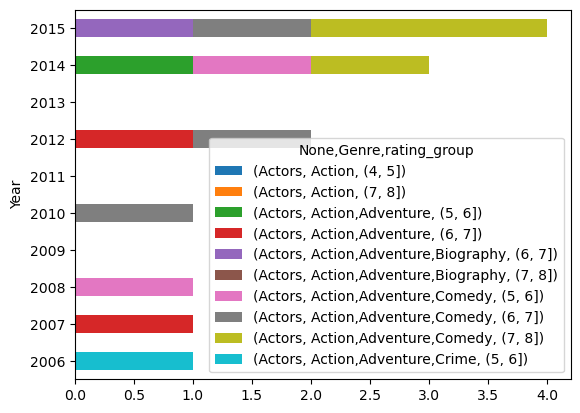

In [48]:
plt.figure(figsize=(20,10))

yr_genre.iloc[0:10, 0:10].plot(kind='barh', stacked='False')

Each year, which rating range(s) is the most concentrated? Does this match your results from the box and scatter plots above?